## HW2 Question5

In [1]:
import numpy as np
import pandas as pd  ##. I only use this module to construct dataframe easier for plot
%matplotlib inline

In [2]:
n=200
M = np.diag(np.repeat(2,n),k=0) + np.diag(np.repeat(-1,n-1),k=1) + np.diag(np.repeat(-1,n-1),k=-1).astype(float)
M[n-1,0] = -1.0
M[0,n-1] = -1.0
b = np.repeat(-1/n,n).astype(float)
b[0] = 1 - 1/n

In [3]:
f = lambda x:1/2*M.dot(x).dot(x) - b.dot(x)
x_star = np.linalg.pinv(M).dot(b)
f_star = f(x_star)
f_star

-8.333124999999967

### Algorithm:

In [4]:
####  SD with constant stepsize 1/L
def SD(N,tol):
    x0 = np.repeat(0,n)
    x_old = x0
    alpha = 1/4
    value = [1/2*M.dot(x0).dot(x0) - b.dot(x0)]
    for i in range(N):
        x_new = x_old - alpha*(M.dot(x_old) - b)
        value.append(f(x_new))
        x_old = x_new
        if (f(x_new) - f_star)**2 <= tol:
            break
    return x_new, value

#### SD with constant exact line search
def SD_ls(N,tol):
    x0 = np.repeat(0,n)
    x_old = x0
    value = [1/2*M.dot(x0).dot(x0) - b.dot(x0)]
    for i in range(N):
        GD = M.dot(x_old) - b
        alpha = GD.dot(GD)/M.dot(GD).dot(GD)
        x_new = x_old - alpha*(M.dot(x_old) - b)
        value.append(f(x_new))
        x_old = x_new
        if (f(x_new) - f_star)**2 <= tol:
            break
    return x_new, value

#### lagged SD with constant exact line search
def lSD_ls(N,tol):
    x0 = np.repeat(0,n)
    x_old = x0
    stepsize = np.repeat(0,N).astype(float)
    value = [1/2*M.dot(x0).dot(x0) - b.dot(x0)]
    for i in range(N):
        GD = M.dot(x_old) - b
        alpha = GD.dot(GD)/M.dot(GD).dot(GD)
        stepsize[i] = alpha
        if i == 0:
            x_new = x_old - stepsize[i]*GD
        else:
            x_new = x_old - stepsize[i-1]*GD
            
        x_new = x_old - alpha*(M.dot(x_old) - b)
        value.append(f(x_new))
        x_old = x_new
        if (f(x_new) - f_star)**2 <= tol:
            break
    return x_new, value

#### Nesterov:
def AGD(N,tol):
    x0 = np.repeat(0,n)
    alpha = 1/4
    y0 = x0 - alpha*(M.dot(x0) - b)
    v0 = y0
    value = [1/2*M.dot(x0).dot(x0) - b.dot(x0)]
    x_old = x0
    y_old = y0
    v_old = v0
    for i in np.arange(1,N+1):
        a = np.arange(1,i+1/2,1/2)
        A = a.sum()
        
        x_new = (A-a[-1])/A*y_old + a[-1]/A*v_old
        y_new = x_new - alpha*(M.dot(x_new) - b)
        v_new = v_old - a[-1]*alpha*(M.dot(x_new) - b)
        
        value.append(f(y_new))
        x_old = x_new; y_old = y_new; v_old = v_new
        #if (f(y_new) - f_star)**2 <= tol:
        #    break
    return y_new, value



#### ( i )

In [5]:
_,value_SD = SD(2000,0.001)
_,value_SDls = SD_ls(2000,.001)
_,value_AGD = AGD(2000,.001)

value_SD = np.log(value_SD - f_star)
value_SDls = np.log(value_SDls - f_star)
value_AGD = np.log(value_AGD - f_star)

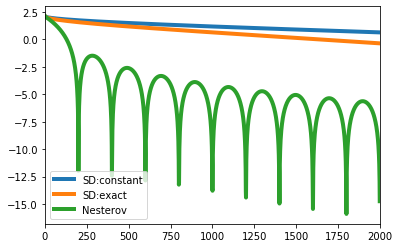

In [7]:
df = pd.DataFrame({"SD:constant":value_SD, "SD:exact": value_SDls, "Nesterov": value_AGD})
df.plot.line(linewidth = 4)
None

As we can see, the SD with exact line search convergence faster than SD with constant step size. The Nesterov's method accelerates the convergence faster than the previous two methods, it also shows fluctuation as we discussed in class.

#### ( ii )

In [8]:
_,value_lSDls= lSD_ls(2000,0.1)
_,value_AGD = AGD(2000,0.1)

value_lSDls = np.log(value_lSDls - f_star)
value_AGD = np.log(value_AGD - f_star)

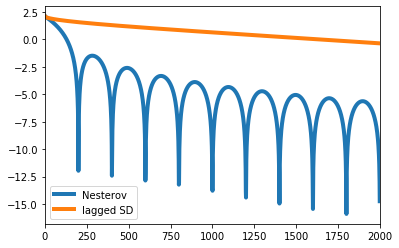

In [10]:
df = pd.DataFrame({"Nesterov":value_AGD, "lagged SD": value_lSDls})
df.plot.line(linewidth = 4)
None

Lagged steepest descent shows the same pattern in steepest descent with exact line search, it has a faster convergence rate compared with the steepest descent with exact line search. The Nesterov's method still has the fastest convergence rate.

#### ( iii )

In [11]:
#### lagged SD with constant exact line search
def lSD_ls(N,tol):
    x0 = np.repeat(0,n)
    x_old = x0
    stepsize = np.repeat(0,N).astype(float)
    value = [1/2*M.dot(x0).dot(x0) - b.dot(x0)]
    for i in range(N):
        GD = M.dot(x_old) - b
        alpha = GD.dot(GD)/M.dot(GD).dot(GD)
        stepsize[i] = alpha
        if i == 0:
            x_new = x_old - stepsize[i]*GD
        else:
            x_new = x_old - stepsize[i-1]*GD
            
        x_new = x_old - alpha*(M.dot(x_old) - b)
        value.append(f(x_new))
        value[-1] = np.min(value)  ## added
        x_old = x_new
        if (f(x_new) - f_star)**2 <= tol:
            break
    return x_new, value

#### Nesterov:
def AGD(N,tol):
    x0 = np.repeat(0,n)
    alpha = 1/4
    y0 = x0 - alpha*(M.dot(x0) - b)
    v0 = y0
    value = [1/2*M.dot(x0).dot(x0) - b.dot(x0)]
    x_old = x0
    y_old = y0
    v_old = v0
    for i in np.arange(1,N+1):
        a = np.arange(1,i+1/2,1/2)
        A = a.sum()
        
        x_new = (A-a[-1])/A*y_old + a[-1]/A*v_old
        y_new = x_new - alpha*(M.dot(x_new) - b)
        v_new = v_old - a[-1]*alpha*(M.dot(x_new) - b)
        
        value.append(f(y_new))
        value[-1] = np.min(value)  ## added
        x_old = x_new; y_old = y_new; v_old = v_new
        #if (f(y_new) - f_star)**2 <= tol:
        #    break
    return y_new, value

In [12]:
_,value_lSDls = lSD_ls(2000,0.1)
_,value_AGD = AGD(2000,.1)

value_lSDls = np.log(value_lSDls - f_star)
value_AGD = np.log(value_AGD - f_star)

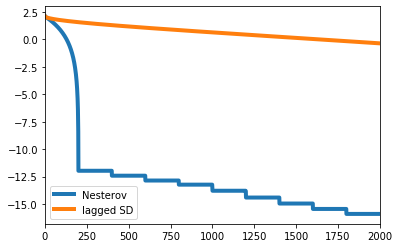

In [13]:
df = pd.DataFrame({"Nesterov":value_AGD, "lagged SD": value_lSDls})
df.plot.line(linewidth = 4)
None

It shows that Nesterov's method has a faster convergence rate. If we keep the lowest function value in k iterations, Nesterov's method does not have oscillations. After the first drop, loss of Nesterov's method shows like a simple function, only drop after each oscillation in the previous plot.